# Classification With Python

in this project notebook i try to practice all the classification algorithm that i learned in the 'IBM Course

In [3]:
# now first load the libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# About the dataset
the dataset is about the past loan. The loan_train.csv dataset include the detail of 346 customers whose loan are already paid off or defaulted

It include the following fields

1. Loan_Status : Whether the loan is paid off or in collection
2. Principle   : Basic principle Loan amount
3. Terms       : Originate terms which can be weekly,biweekly,and monthly,pay off originated and took effect
4. Effective_date : When the loan got originated and took effect
5. Due_date    : Since it is one_time payoff schedule. Each loan has one single due_date
6. Age         : Age of Applicant
7. Education   : Education of applicant
8. Gender      : Gender of applicant

# Load Data From CSV File

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
# make the copy of data
df1 = df.copy()

In [6]:
df.shape

(346, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    346 non-null    int64 
 1   Unnamed: 0      346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


as i saw the above effective_date or due_date in object type so first i change the type of these feature into date_time format

In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0.1    346 non-null    int64         
 1   Unnamed: 0      346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.2+ KB


In [9]:
# Let’s see how many of each class is in our data set

df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64


260 people have paid off the loan on time while 86 have gone into collection

Lets plot some columns to underestand data better:

# Data visualization and pre-processing

c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


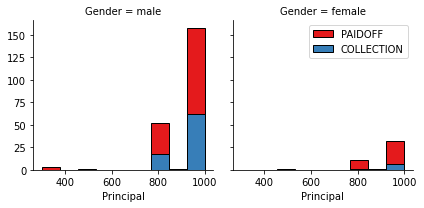

In [10]:
import seaborn as sns
bins = np.linspace(df.Principal.min(),df.Principal.max(),10)
g = sns.FacetGrid(df,col='Gender',hue='loan_status',palette='Set1',col_wrap=2)
g.map(plt.hist,'Principal',bins=bins,ec='k')
g.axes[-1].legend()
plt.show()

In [11]:
df['effective_date']

0     2016-09-08
1     2016-09-08
2     2016-09-08
3     2016-09-09
4     2016-09-09
         ...    
341   2016-09-11
342   2016-09-11
343   2016-09-12
344   2016-09-12
345   2016-09-12
Name: effective_date, Length: 346, dtype: datetime64[ns]

c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


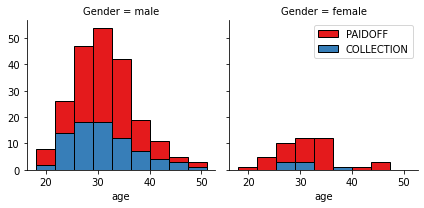

In [12]:
# as for the age column
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Lets look at the day of the week people get the loan

c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


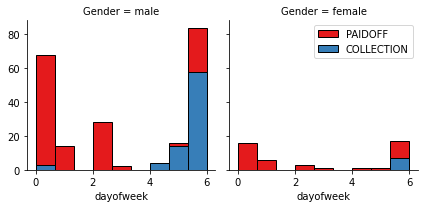

In [13]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


Lets look at the Months people get the loan

#### as the observation shows people who get the loan at the end of the week don't pay it off, so lets use Feature binarization to set a threshold values less then day 4

In [14]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


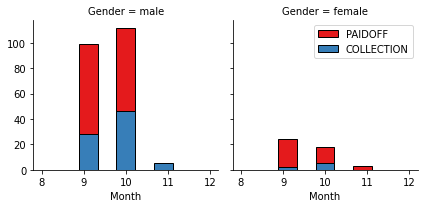

In [15]:
df['Month'] = df.due_date.dt.month
bins = np.linspace(df.Month.min()-1, df.Month.max()+1, 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Month', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

there is higher possibility that people pay off the loan in 9th month than paying it in 10th or 11th

In [16]:
# lets look on the gender

df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan

### Lets convert male to 0 and female to 1: Convert Categorical features to numerical values

In [17]:
df['Gender'].replace(to_replace=['male','female'],value=(0,1),inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,Month
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,10
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,10
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,9
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,10
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,10


# Feature Engeenering

In [18]:
df['deadline'] = df['due_date']-df['effective_date']
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,Month,deadline
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,10,29 days
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,10,29 days
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,9,14 days
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,10,29 days
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,10,29 days


i only saw the date in number not along with the day word

In [19]:
df['deadline'] = df['deadline'].dt.days
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,Month,deadline
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,10,29
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,10,29
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,9,14
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,10,29
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,10,29


### How about education?

In [20]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [21]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

as i saw in the education column 'master or above' is only two one is paid or other                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         in                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      collection                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

We use one hot encoding technique to convert categorical variables to binary variables and append them to the feature Data Frame

In [22]:
# so i drop these two value in my dataset
Feature = df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


*based on the tested rusults columns Month and deadline doesn't improve the result so we will not use them in feature sets of training

# Feature selection

In [23]:
X = Feature
X

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1
...,...,...,...,...,...,...,...,...,...
341,800,15,32,0,1,6,0,1,0
342,1000,30,25,0,1,6,0,1,0
343,800,15,39,0,0,0,0,0,1
344,1000,30,28,0,0,0,0,0,1


In [24]:
X[0:5]

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


# Our labels

In [25]:
y=df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'],value=[0,1]).values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [26]:
X= preprocessing.StandardScaler().fit_transform(X) # z = (x - u) / s

In [27]:
X

array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679]])

 Jaccard similarity coefficient, defined as the size of the intersection divided by the size of the union of two label sets, is used to compare set of predicted labels for a sample to the corresponding set of labels in y_true.

In [38]:
from sklearn.metrics import jaccard_score


In [28]:
# import scoring methods
# from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

In [29]:
# our data for training (used '_train' just for improving readability)
X_train, y_train=X,y

In [30]:
X_train.shape, y_train.shape

((346, 9), (346,))

In [31]:
# a dictionary for keeping all scores of the classifiers
trainScores={}


# K Nearest Neighbor(KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
bestScore = 0.0
accList=[]

for k in range(3,12):
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')

    #using the 10 cross validation for scoring the classifier accuracy
    scores = cross_val_score(clf_knn,X,y,cv=10)
    score = scores.mean()
    accList.append(score)

    if score > bestScore:
        bestScore = score
        best_clf = clf_knn
        bestK = k


print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
clf_knn=best_clf


Best K is : 8 | Cross validation Accuracy : 0.7579831932773109


In [33]:
clf_knn.fit(X_train,y_train)
y_pred=best_clf.predict(X_train)

In [39]:
trainScores['KNN-jaccard']=jaccard_score(y_train, y_pred)
trainScores['KNN-f1-score']=f1_score(y_train, y_pred, average='weighted')

In [40]:
trainScores

{'KNN-jaccard': 0.25252525252525254, 'KNN-f1-score': 0.7537693061220201}

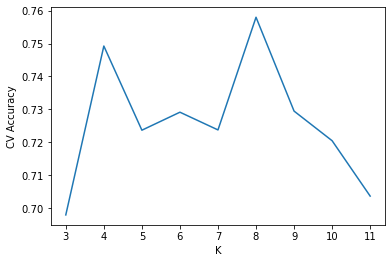

In [41]:
plt.plot(range(3,12),accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

# Decision Tree

In [43]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree =  clf_tree.fit(X_train,y_train)


In [44]:
y_pred = clf_tree.predict(X_train)

In [47]:
# check the classifier score
trainScores['Tree-jaccard']=jaccard_score(y_train, y_pred)
trainScores['Tree-f1-score']=f1_score(y_train, y_pred, average='weighted')  
trainScores

{'KNN-jaccard': 0.25252525252525254,
 'KNN-f1-score': 0.7537693061220201,
 'Tree-jaccard': 0.7222222222222222,
 'Tree-f1-score': 0.924927020820985}

F1 score is the way of combining two important matrics 'percision' and 'recall' into a single value

Percision : is the proportion of correctly identifies positive cases from all the predicted positive casses TP/TP+FP

Recall : While Recall is the proportion to correctly identified positive casses from all the actual positive cases TP/TP+FN

The F1 score takes both of the two matrics into account to give the overall performance score of the model or the classifier

F1 score = 2 * Percision*Recall/Percision+Recall
so F1 is the Harmonic means of Percision and Recall which means that it gives more weight to the lower of the two values
The F1 score values range between 0 and 1 and with a highest score indicate the better model performance

In simple words, F1 score is the measure of model accuracy that takes into the account


Jaccard Similarity :
Is defined as the number of overlaping items found in both set divided by the total number of TP/TP+FP+FN
this term is use for the binnary classification problem

# Visualizng the tree

In [48]:
! pip install graphviz

In [49]:
! pip install pydotplus

In [57]:
import graphviz 
import pydotplus


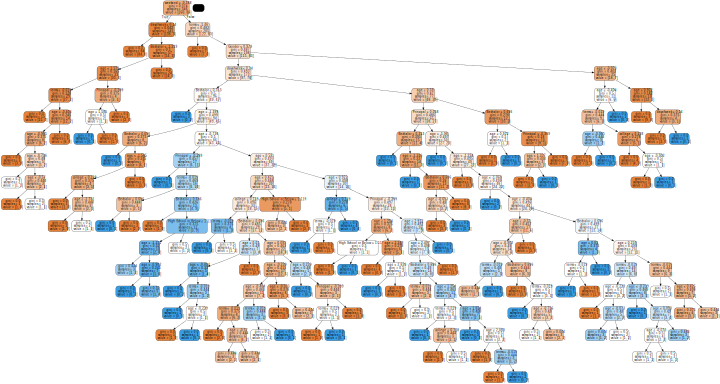

In [62]:
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                     feature_names=['Principal',
                                    'terms','age',
                                    'Gender',
                                    'weekend',
                                    'Bechalor',
                                    'High School or Below',
                                    'college',
                                    'dayofweek',
                                     #'deadline'
#                                     ,'Month'
                                   ],  
                      
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"10,8!"')
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph 

In [60]:
import sklearn
print(sklearn.__version__)

1.3.0


# Support Vector Machine

In [63]:
y_train = y_train.astype(float)

In [65]:
from sklearn import svm
clf_svm = svm.LinearSVC(random_state=7)
clf_svm.fit(X_train,y_train)

y_pred = clf_svm.predict(X_train)


c:\Users\ANZAR AZIZ\.conda\envs\py34\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [68]:
trainScores['SVM-jaccard']=jaccard_score(y_train, y_pred)
trainScores['SVM-f1-score']=f1_score(y_train, y_pred, average='weighted') 
trainScores

{'KNN-jaccard': 0.25252525252525254,
 'KNN-f1-score': 0.7537693061220201,
 'Tree-jaccard': 0.7222222222222222,
 'Tree-f1-score': 0.924927020820985,
 'SVM-jaccard': 0.054945054945054944,
 'SVM-f1-score': 0.6689062277741139}

# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial')  
clf_log.fit(X_train,y_train)
y_pred = clf_log.predict(X_train)
y_proba=clf_log.predict_proba(X_train)

In [73]:
testScores['LogReg-logLoss']=log_loss(testy, proba)

NameError: name 'testy' is not defined

In [75]:


trainScores['LogReg-jaccard']=jaccard_score(y_train, y_pred)
trainScores['LogReg-f1-score']=f1_score(y_train, y_pred, average='weighted')  
trainScores['LogReg-logLoss']=log_loss(y_train, y_proba)
trainScores

{'KNN-jaccard': 0.25252525252525254,
 'KNN-f1-score': 0.7537693061220201,
 'Tree-jaccard': 0.7222222222222222,
 'Tree-f1-score': 0.924927020820985,
 'SVM-jaccard': 0.054945054945054944,
 'SVM-f1-score': 0.6689062277741139,
 'LogReg-jaccard': 0.14583333333333334,
 'LogReg-f1-score': 0.7088399037150602,
 'LogReg-logLoss': 0.43174993676801543}

# **Model Evaluation using Test set**

#### Load Test set for evaluation

In [76]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


now i perform the all process on the test data which i did on the train data

In [79]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_df['Month'] = test_df.due_date.dt.month 

test_df['deadline']=test_df['due_date']-test_df['effective_date']
test_df['deadline']=test_df['deadline'].dt.days

Feature = test_df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X = Feature

y = test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values

testy=y.astype(float)
testX= preprocessing.StandardScaler().fit_transform(X)

In [80]:
testScores={}

In [82]:
knn_pred=clf_knn.predict(testX)
testScores['KNN-jaccard']=jaccard_score(testy, knn_pred)
testScores['KNN-f1-score']=f1_score(testy, knn_pred, average='weighted')  

In [84]:
tree_pred=clf_tree.predict(testX)
testScores['Tree-jaccard']=jaccard_score(testy, tree_pred)
testScores['Tree-f1-score']=f1_score(testy, tree_pred, average='weighted')  

In [86]:
svm_pred=clf_svm.predict(testX)
testScores['SVM-jaccard']=jaccard_score(testy, svm_pred)
testScores['SVM-f1-score']=f1_score(testy, svm_pred, average='weighted')  

In [87]:
log_pred=clf_log.predict(testX)
proba=clf_log.predict_proba(testX)
testScores['LogReg-jaccard']=jaccard_score(testy, log_pred)
testScores['LogReg-f1-score']=f1_score(testy, log_pred, average='weighted')  
testScores['LogReg-logLoss']=log_loss(testy, proba)

In [88]:
trainScores

{'KNN-jaccard': 0.25252525252525254,
 'KNN-f1-score': 0.7537693061220201,
 'Tree-jaccard': 0.7222222222222222,
 'Tree-f1-score': 0.924927020820985,
 'SVM-jaccard': 0.054945054945054944,
 'SVM-f1-score': 0.6689062277741139,
 'LogReg-jaccard': 0.14583333333333334,
 'LogReg-f1-score': 0.7088399037150602,
 'LogReg-logLoss': 0.43174993676801543}

In [89]:
testScores

{'KNN-jaccard': 0.2222222222222222,
 'KNN-f1-score': 0.7144311330357843,
 'Tree-jaccard': 0.38095238095238093,
 'Tree-f1-score': 0.7618862861115153,
 'SVM-jaccard': 0.13333333333333333,
 'SVM-f1-score': 0.6959228135698723,
 'LogReg-jaccard': 0.14285714285714285,
 'LogReg-f1-score': 0.708937198067633,
 'LogReg-logLoss': 0.4739578521073104}

In [90]:
# Features used
list(Feature.columns)

['Principal',
 'terms',
 'age',
 'Gender',
 'weekend',
 'dayofweek',
 'Bechalor',
 'High School or Below',
 'college']

# **Reports**


Algorithm	Jaccard	  F1-score	  LogLoss

KNN	        0.22	 0.7144	       NA

Decision

Tree        0.3809    0.7618	   NA

SVM	         0.13	 0.6959	       NA

Logistic
Regression	0.1428	 0.7089	     0.4739

Even though Decision tree had shown a relatively good result in trainig ,but it is Logistic Regression that out-performs the other models in test .
out tree model suffers from over-fitting